## Problem Statement 

You are working as a data scientist in a global company. Over the years, the company has collected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking.

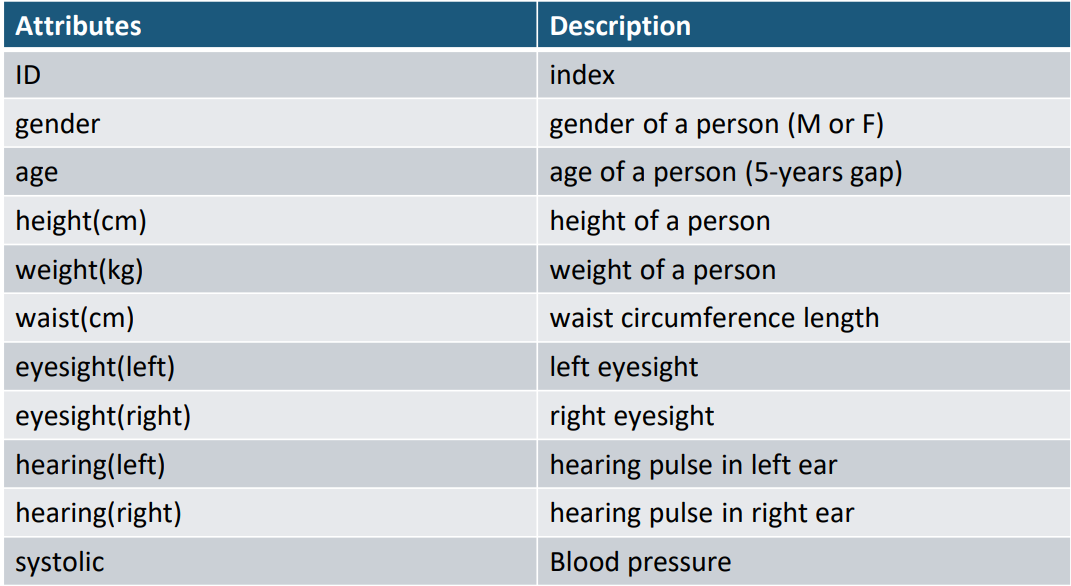
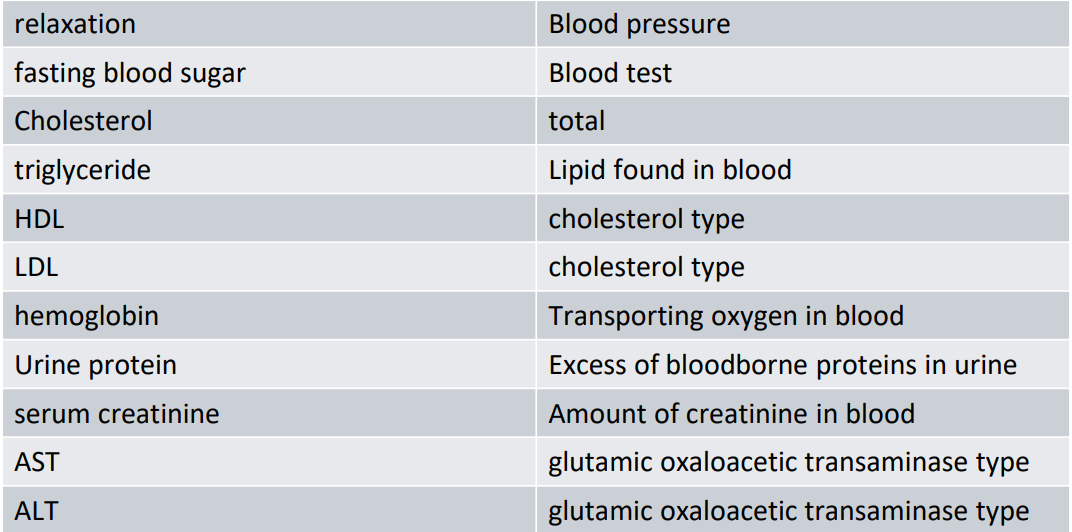
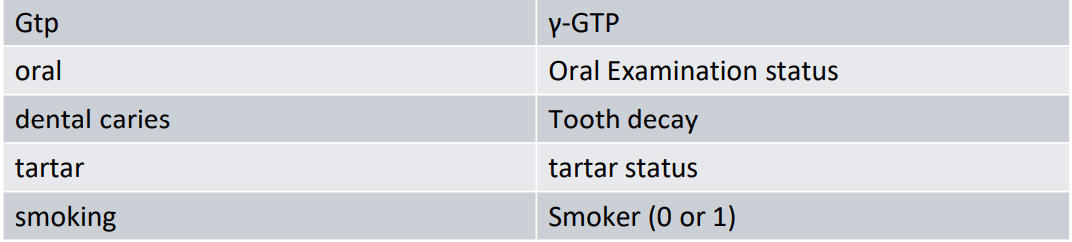

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [65]:
df = pd.read_csv("smoking.csv")

In [66]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [67]:
df = df.drop(columns = ['ID', 'oral'])

In [68]:
print(f"""--------------------------------------------
No. of obsevations in dataset: {df.shape[0]}
No. of features in dataset: {df.shape[1]}""")

--------------------------------------------
No. of obsevations in dataset: 55692
No. of features in dataset: 25


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [70]:
df.duplicated().sum()

11140

In [71]:
df = df.drop_duplicates(keep='first')

In [178]:
df.nunique().sort_values()

gender                   2
dental caries            2
tartar                   2
hearing(right)           2
hearing(left)            2
smoking                  2
Urine protein            6
height(cm)              13
age                     14
eyesight(right)         17
eyesight(left)          19
weight(kg)              22
serum creatinine        38
relaxation              95
HDL                    126
systolic               130
hemoglobin             145
AST                    219
ALT                    245
fasting blood sugar    276
Cholesterol            286
LDL                    289
triglyceride           390
Gtp                    488
waist(cm)              566
dtype: int64

**Observations:**
- Data is cleaned and consistent.

## Exploratory Data Analysis

**Categorical Features:**

In [179]:
cat_cols = df.nunique().sort_values().index[:7]
cat_cols

Index(['gender', 'dental caries', 'tartar', 'hearing(right)', 'hearing(left)',
       'smoking', 'Urine protein'],
      dtype='object')

In [180]:
def cat_plt(column):

    ct = pd.crosstab(index = df[column],
               columns = df['smoking'],
               margins = True)
    ft = ct/ct.loc['All', 'All']

    plt.subplots(1,2, figsize = (12,7))

    plt.subplot(1,2,1)
    plt.pie(x = ct.iloc[:-1, -1],
           labels = ct.index[:-1],
           colors = ['tomato', 'turquoise'],
           autopct = '%.2f%%')
    plt.title(f"{column} Proportion")

    plt.subplot(1,2,2)
    sns.countplot(data = df, x = column, hue = 'smoking', palette= 'Set3')
    plt.title(f"{column} Count")
    plt.show()


    ft.iloc[:-1, :-1].plot(kind='bar', stacked=True, cmap = 'Set3', figsize = (12,7))
    plt.ylabel("Proportion")
    plt.title(f"Proportion of {column} as smoking status")
    plt.show()

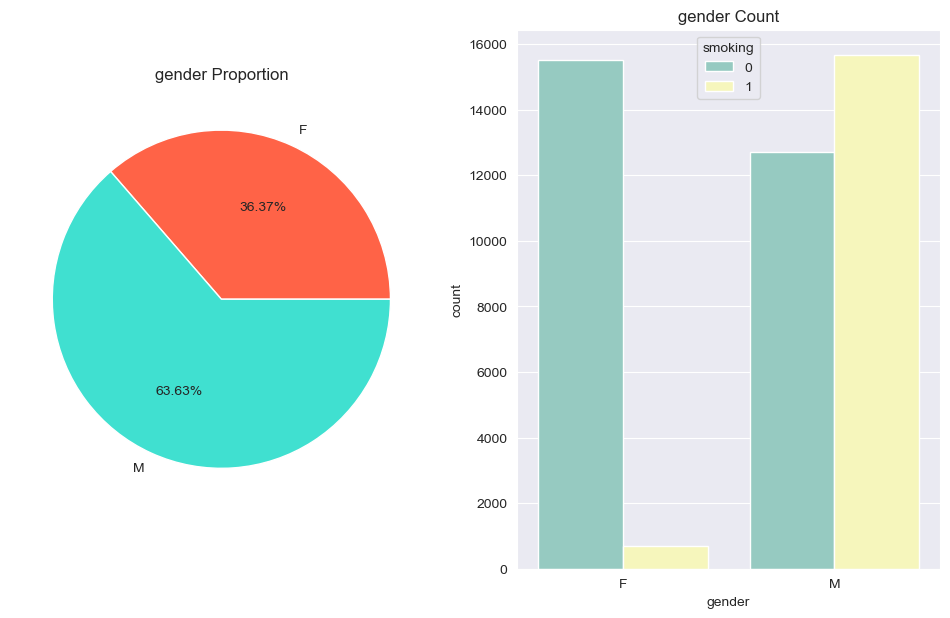

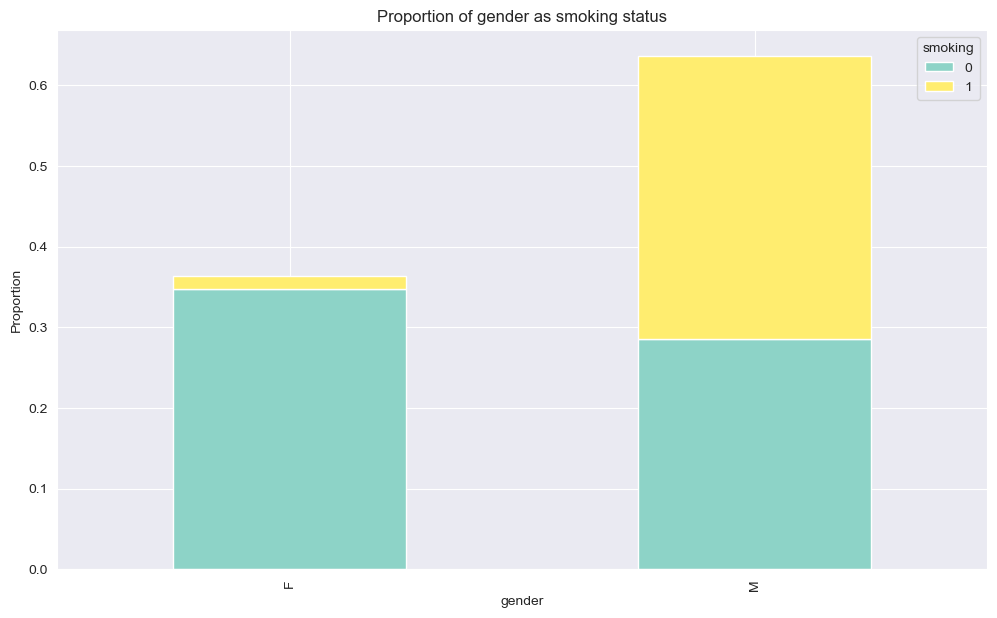

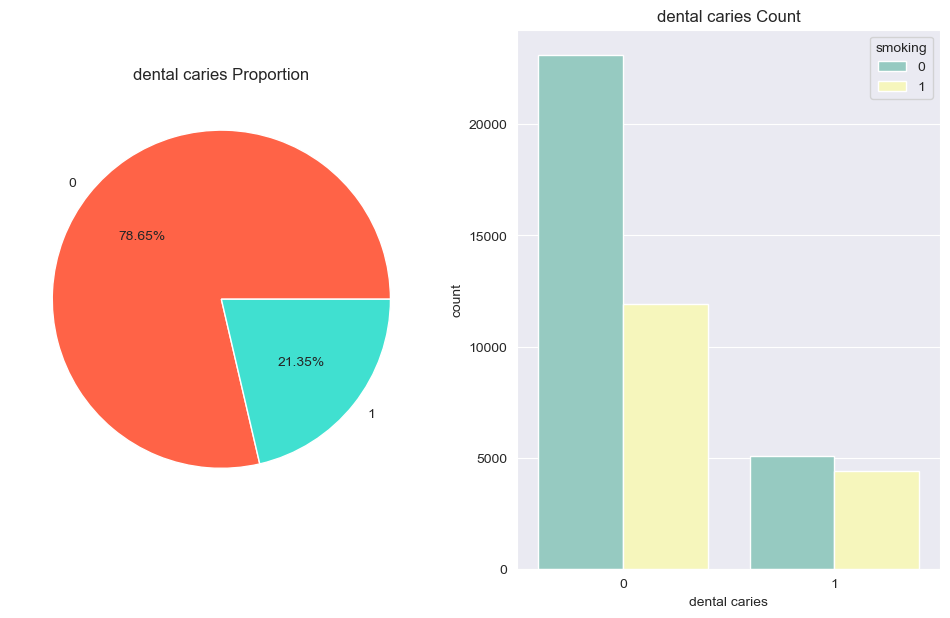

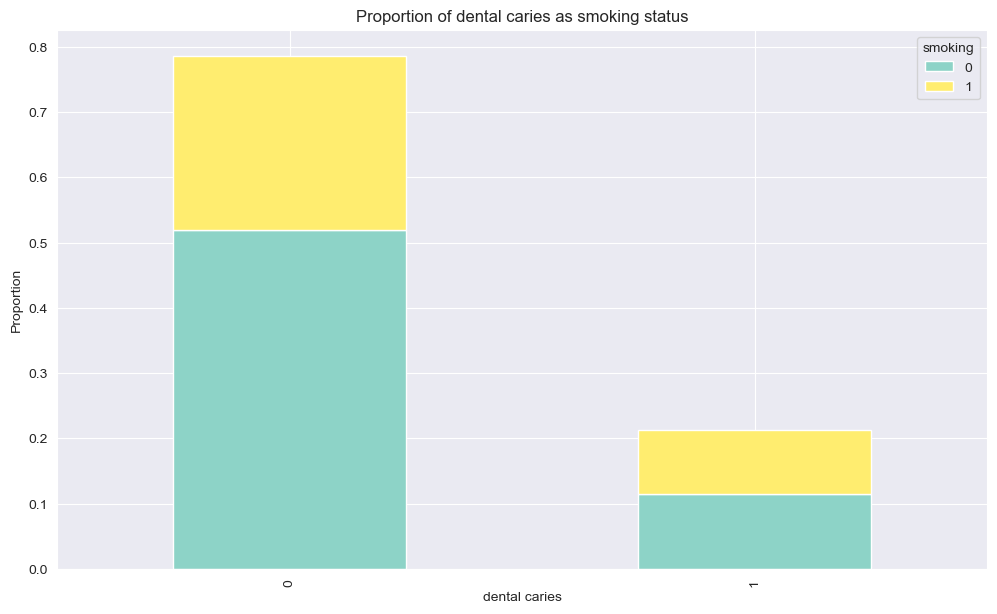

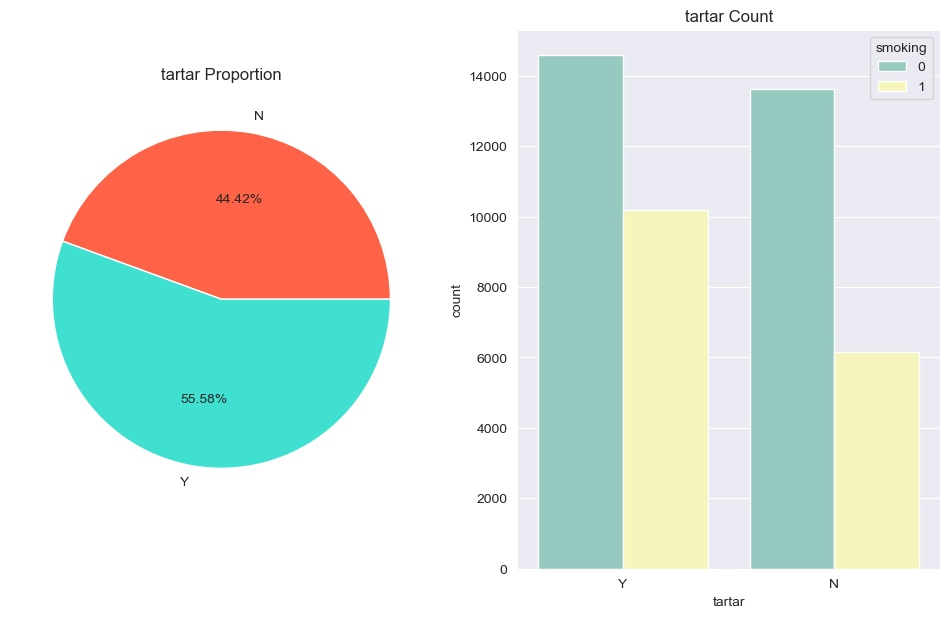

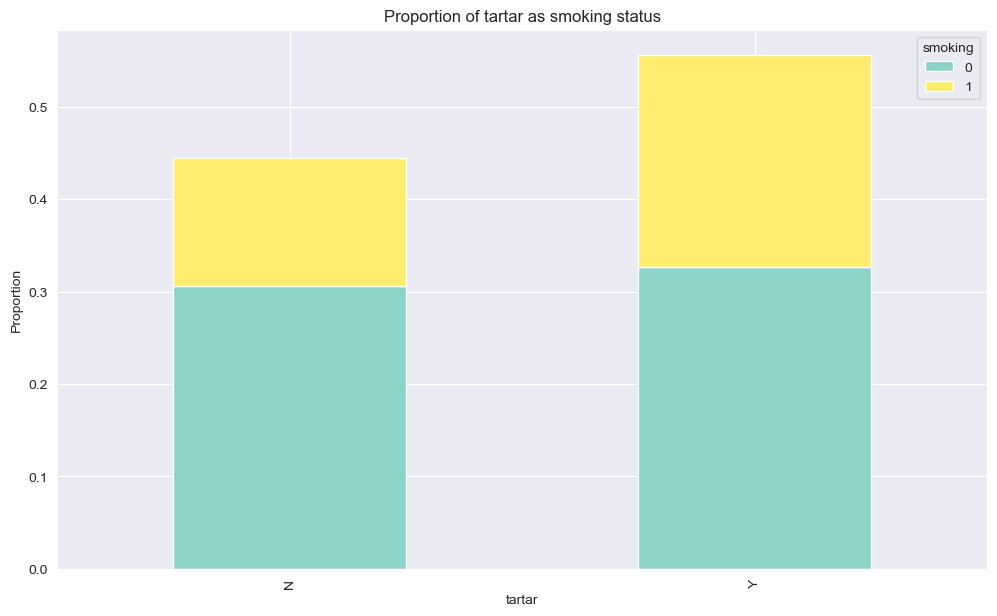

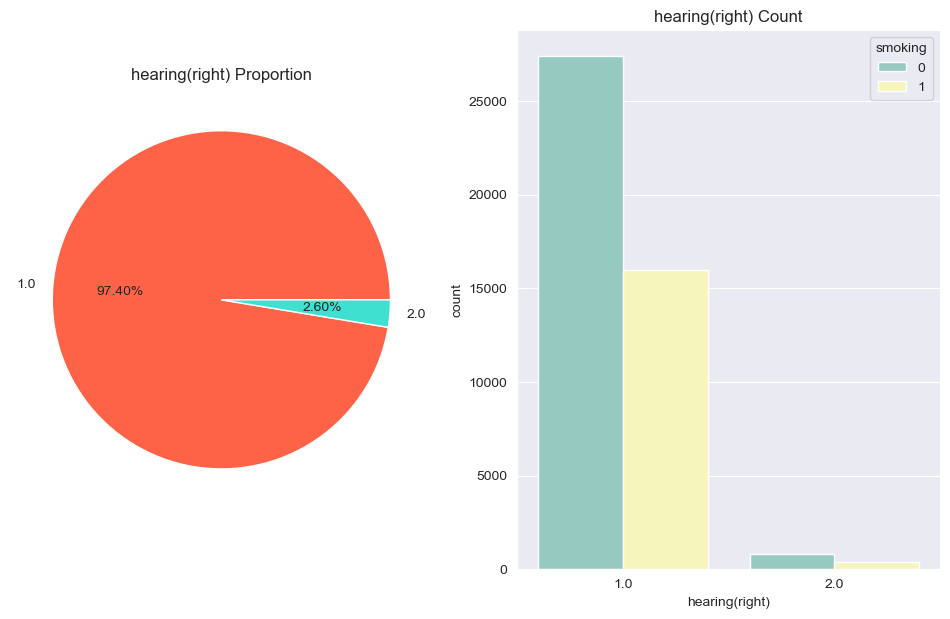

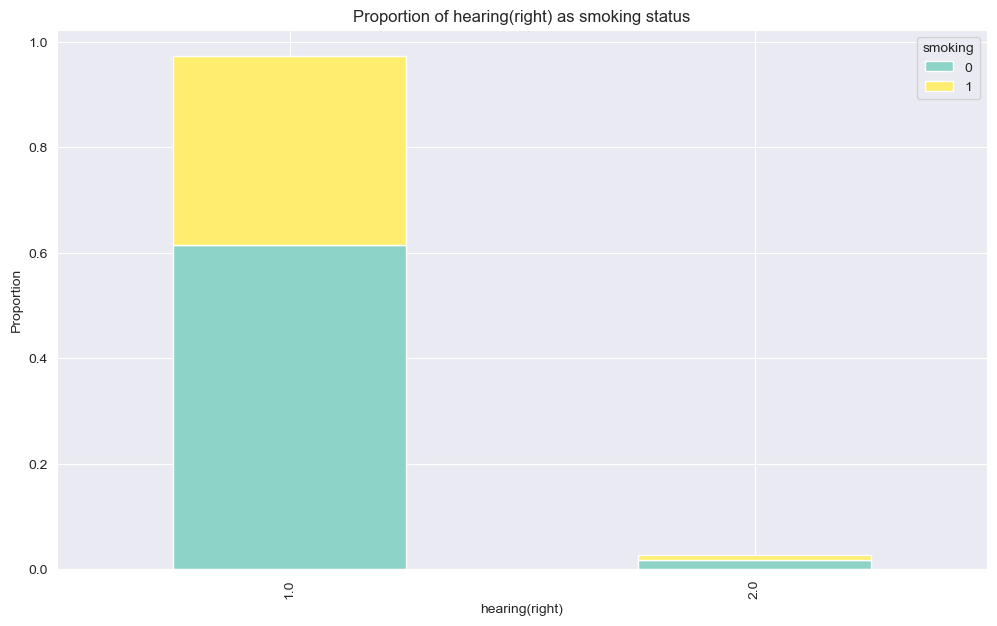

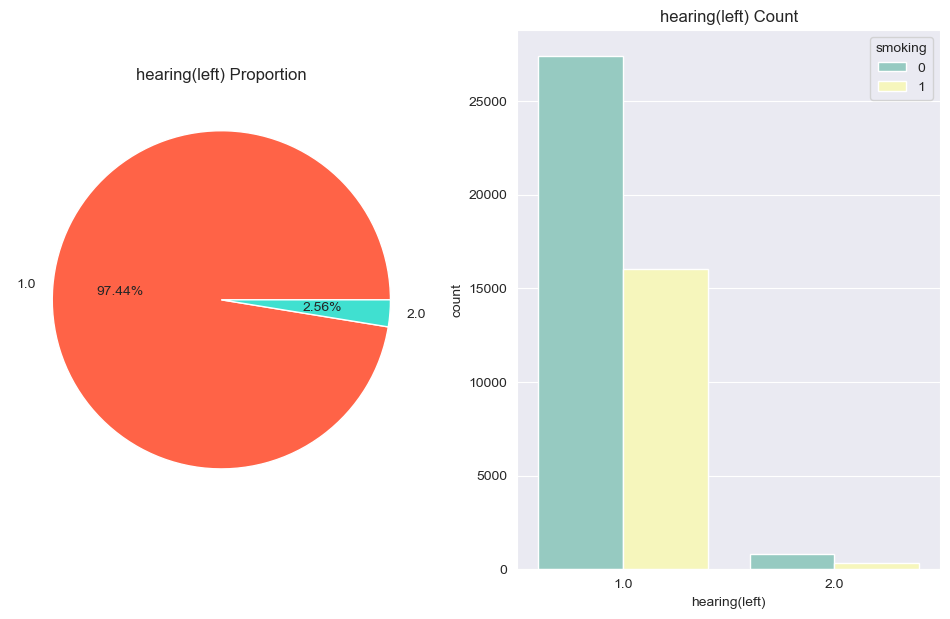

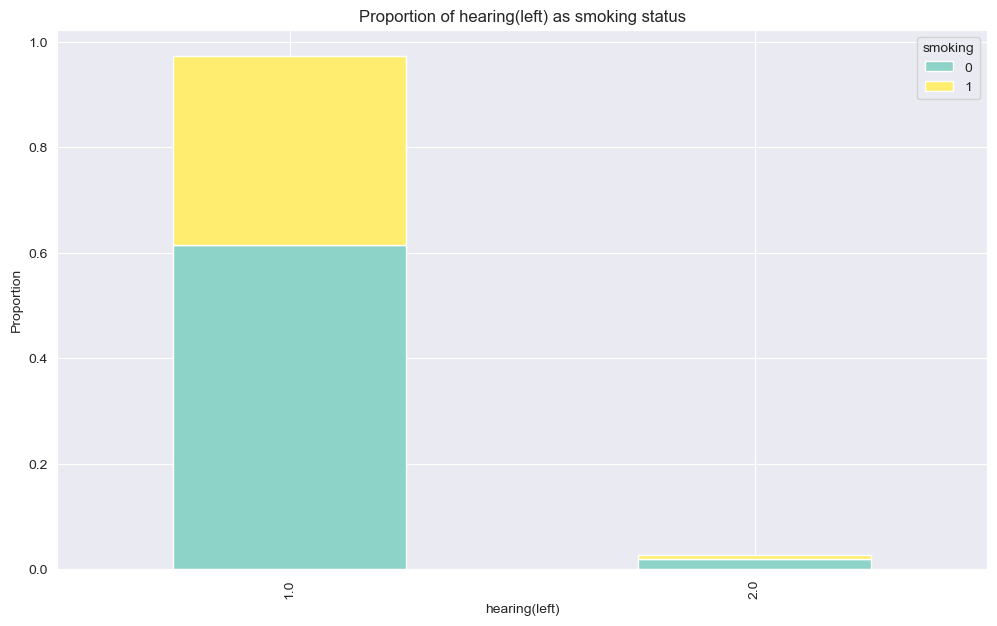

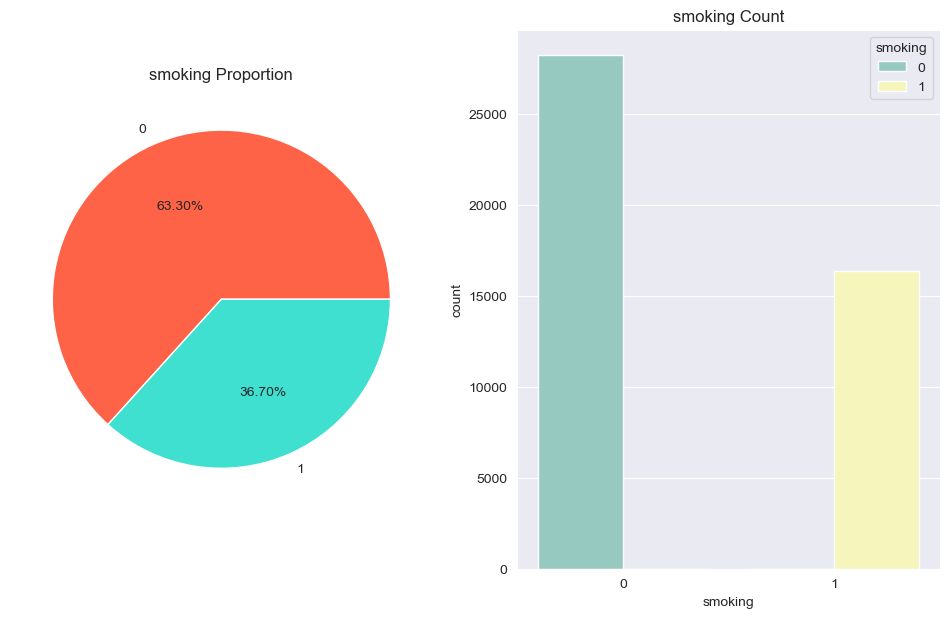

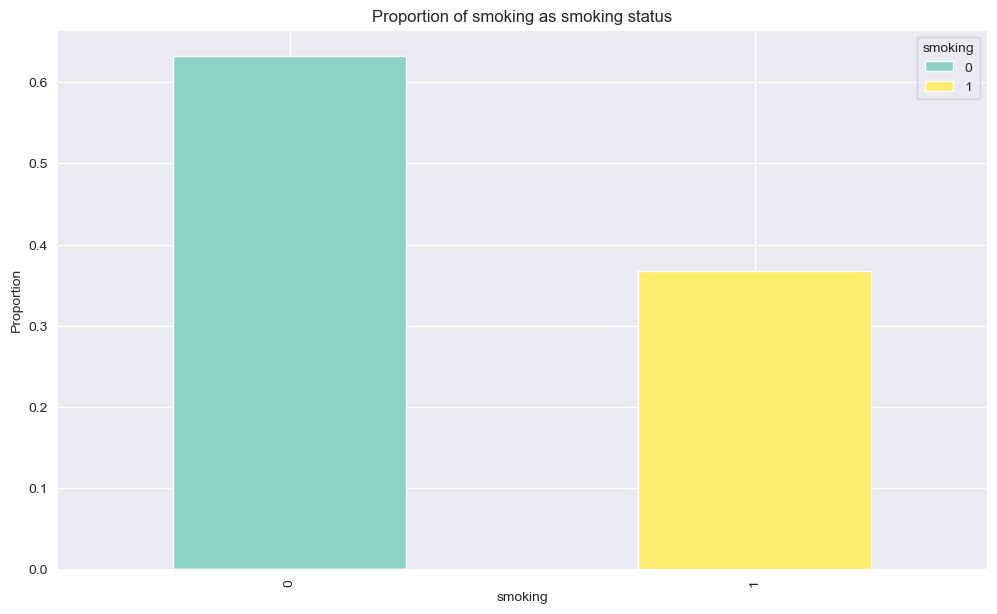

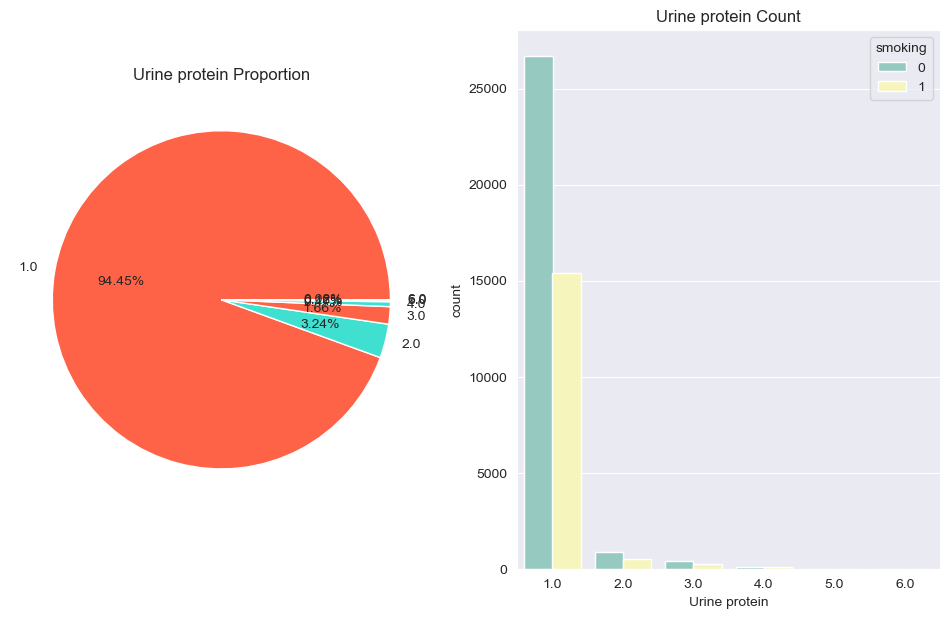

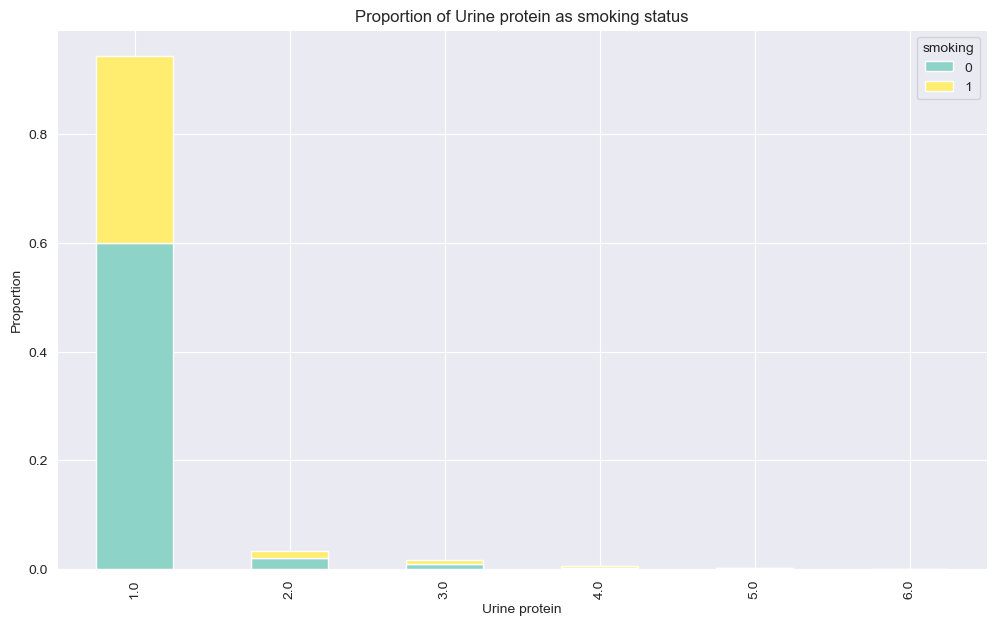

In [181]:
for col in cat_cols:
    cat_plt(col)

In [182]:
cat_cols

Index(['gender', 'dental caries', 'tartar', 'hearing(right)', 'hearing(left)',
       'smoking', 'Urine protein'],
      dtype='object')

**Hypothesis:**
    
- Target feature `smoking` is dependent on `gender` and independent of  'dental caries', 'tartar', 'hearing(right)', 'hearing(left)', 'Urine protein'


**Numerical Features:**

In [192]:
num_cols = [col for col in df.columns if col not in cat_cols]
num_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

In [193]:
def num_plt(column):
    plt.subplots(1,2, figsize = (12,8))

    plt.subplot(121)

    mean0 = np.round(df[column].loc[df['smoking'] == 0].mean(),2)
    mean1 = np.round(df[column].loc[df['smoking'] == 1].mean(),2)

    sns.histplot(data = df, x = column, hue = 'smoking')
    plt.axvline(x = mean0, linestyle = '--', color = 'maroon', label = 'Mean Non-Smoker')
    plt.axvline(x = mean1, linestyle = '--', color = 'blueviolet', label = 'Mean Smoker')
    plt.legend(['Mean Non-Smoker', 'Mean  Smoker', 'Smoker', 'Non-Smoker'])
    plt.title(f"Distribution of {column}")

    plt.subplot(122)
    sns.boxplot(data= df, x = 'smoking', y = column)
    plt.title(f"Distribution of {column} per smoking category")
    plt.show()
    

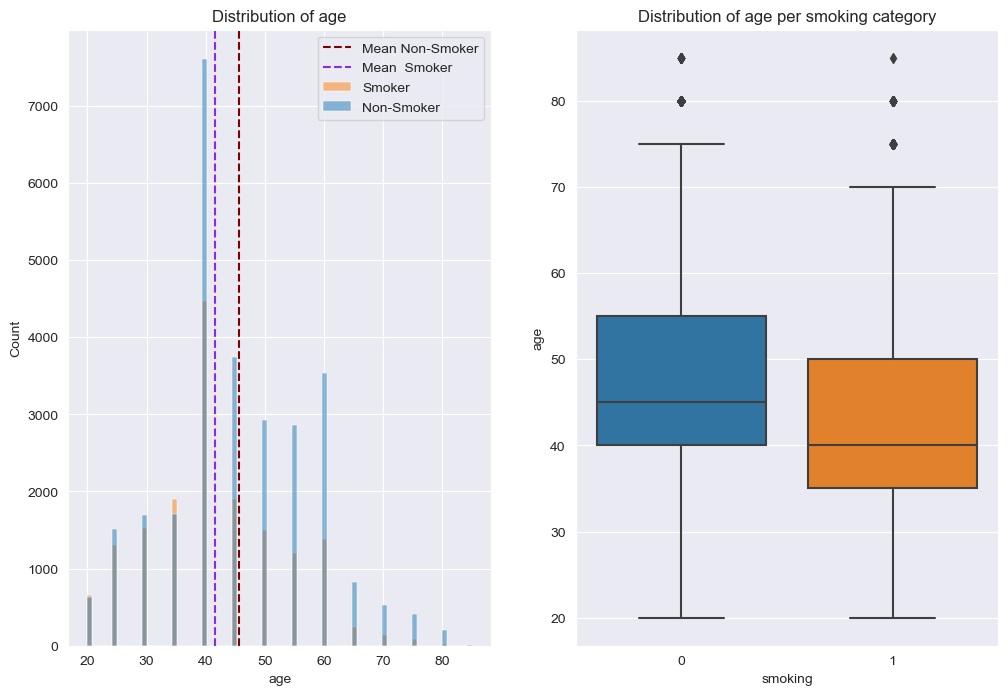

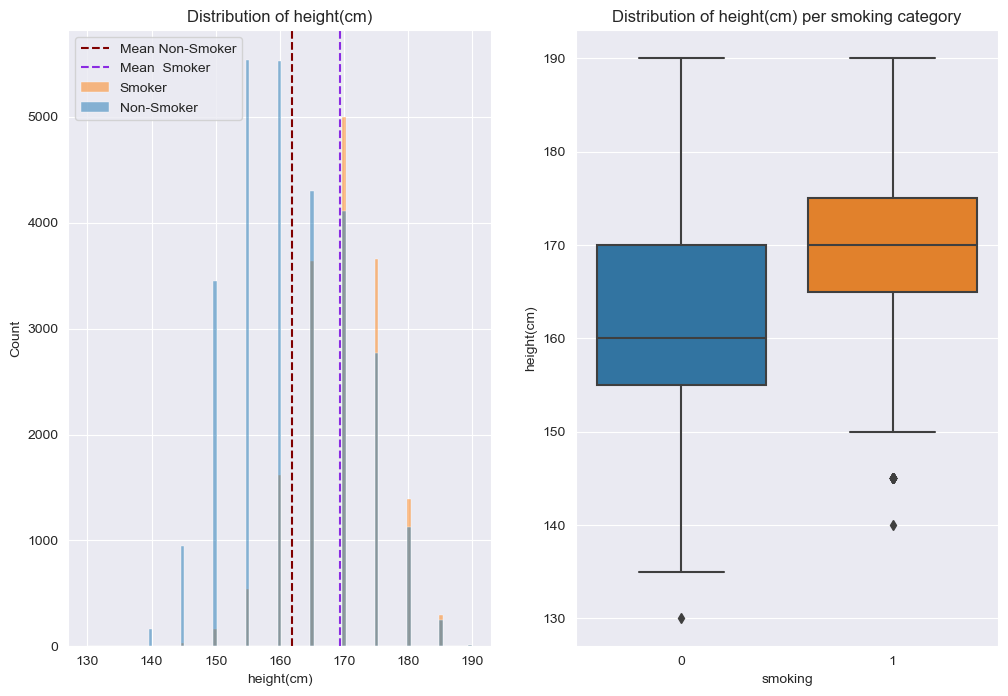

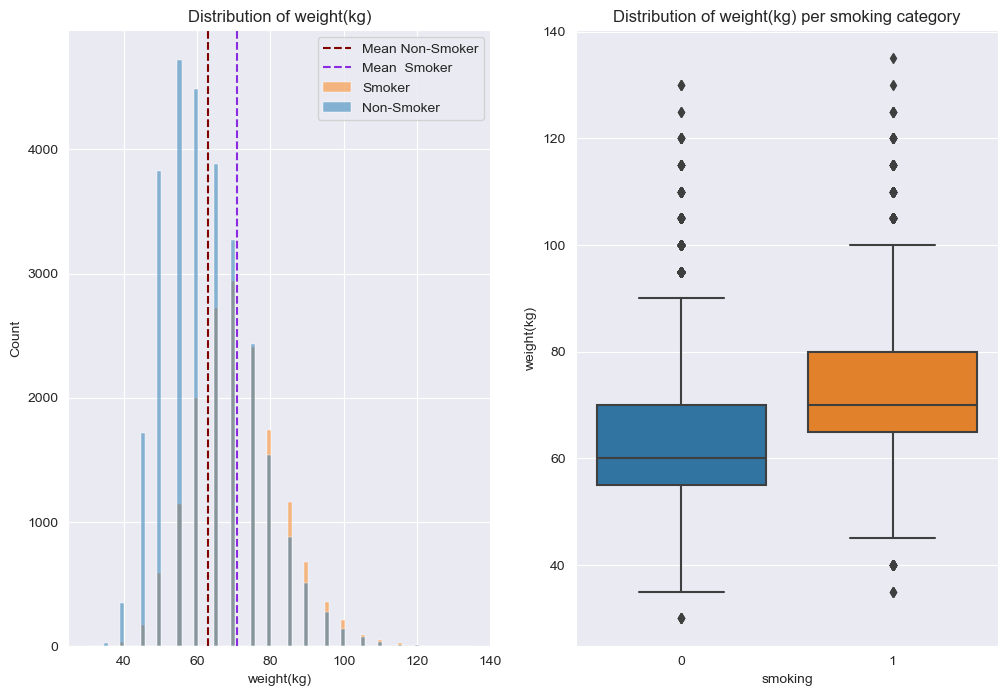

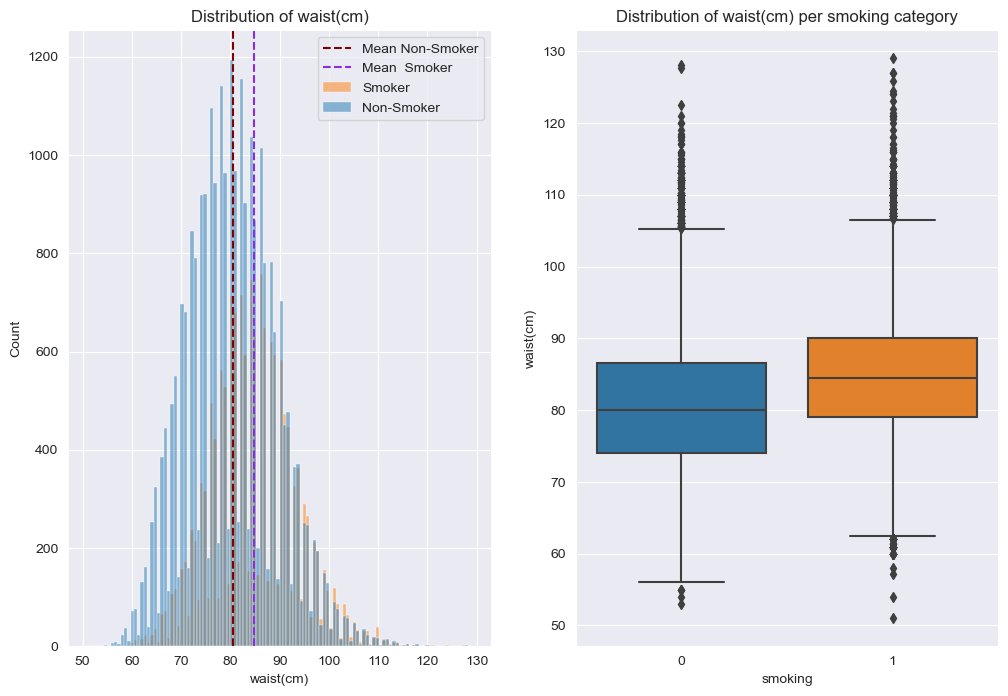

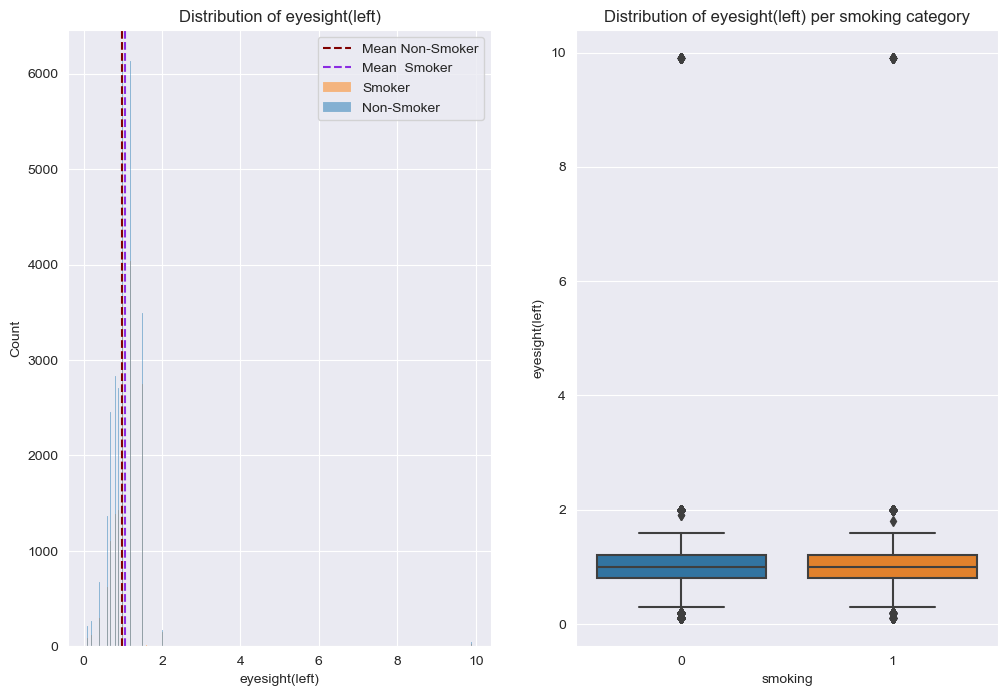

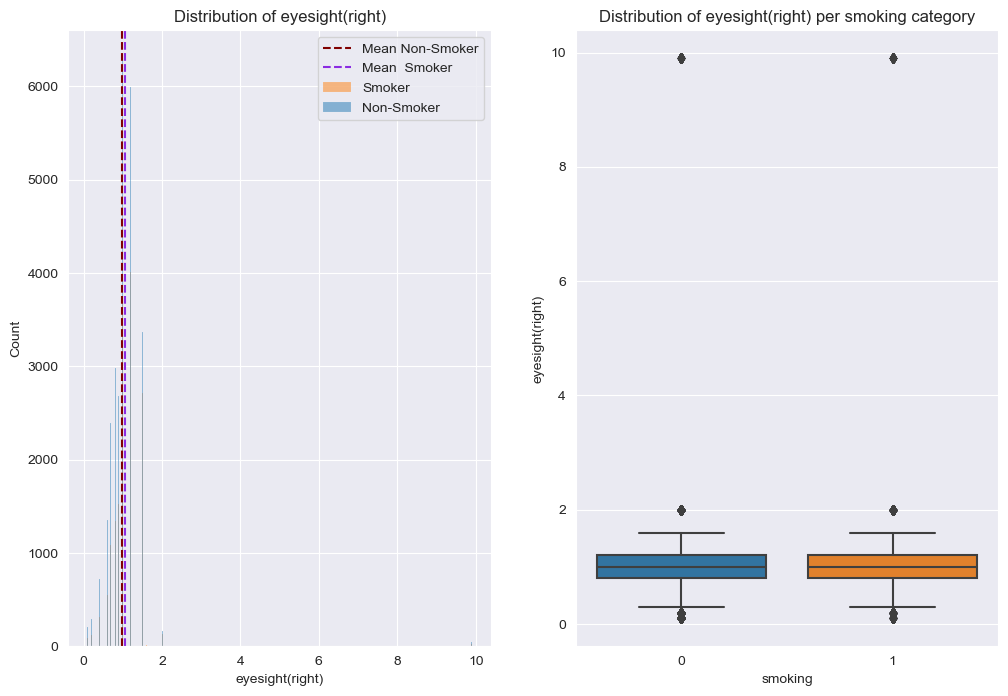

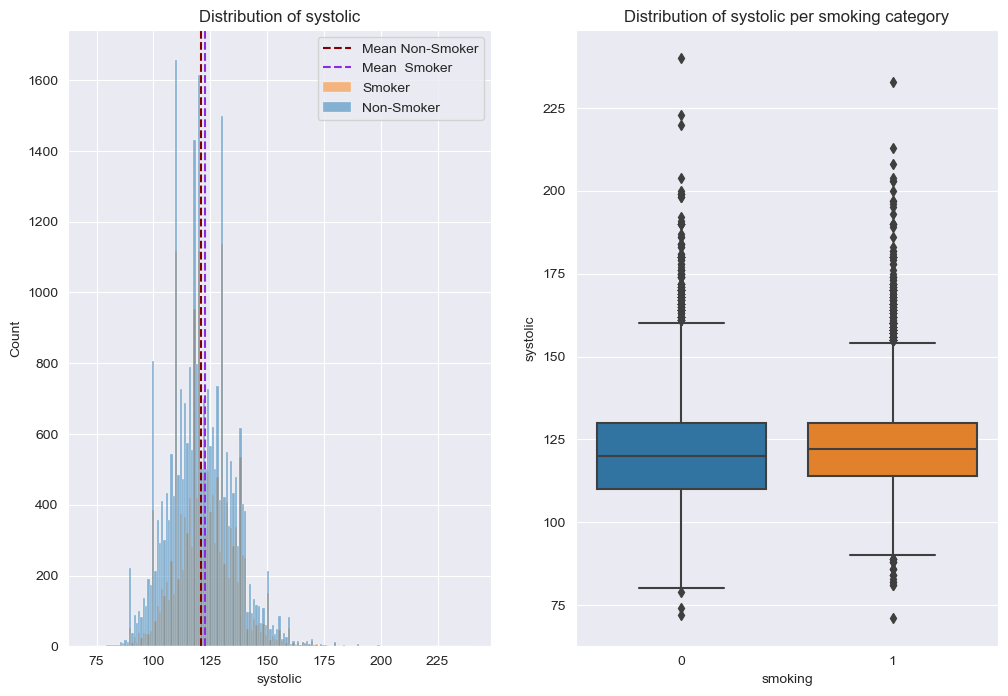

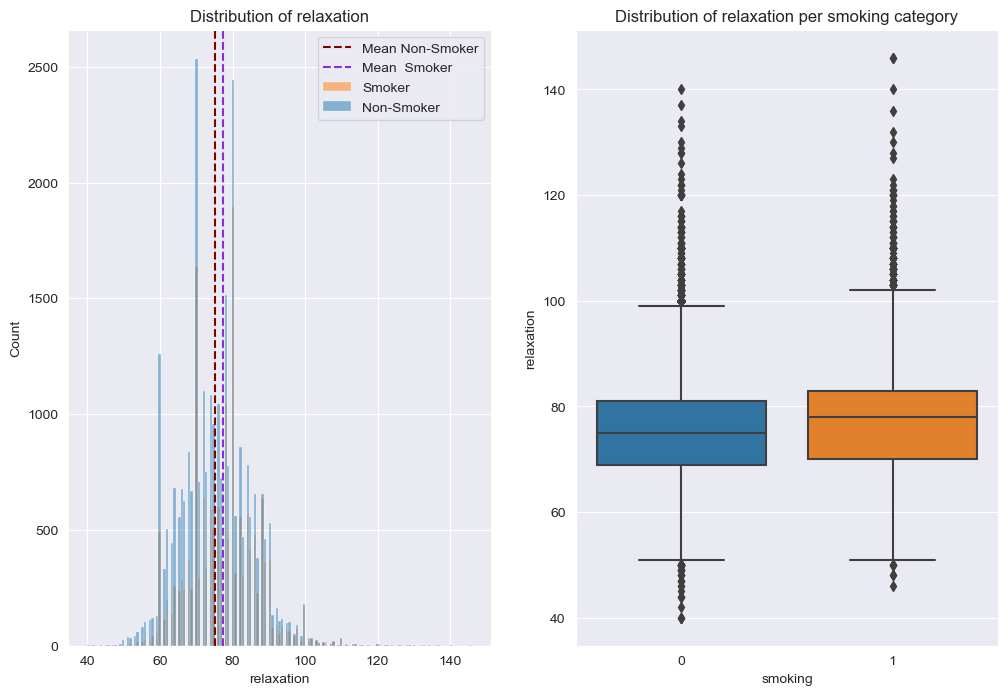

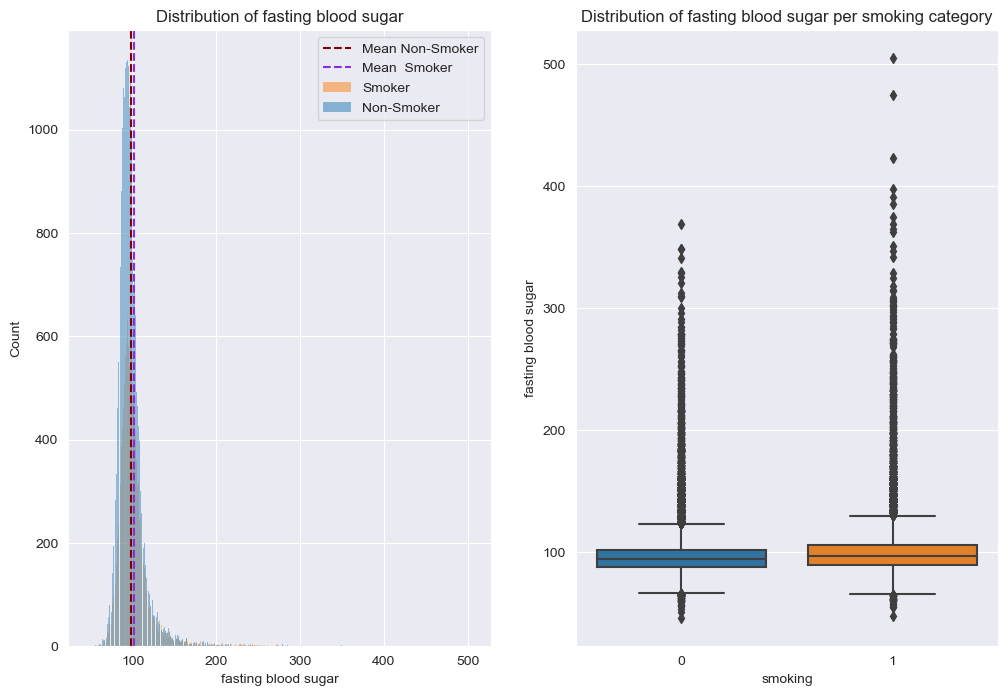

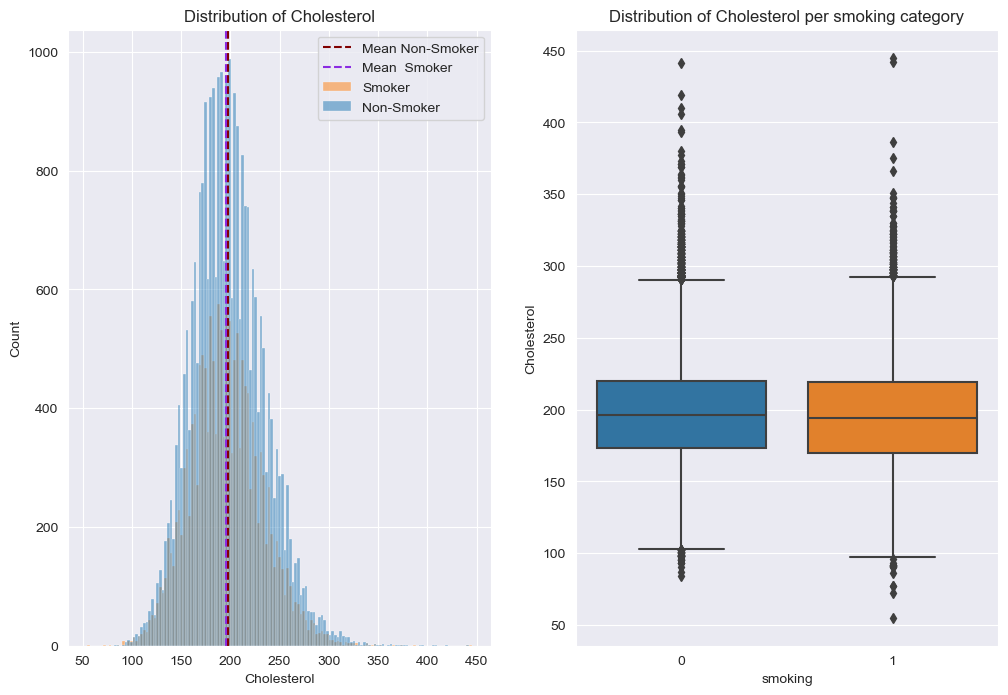

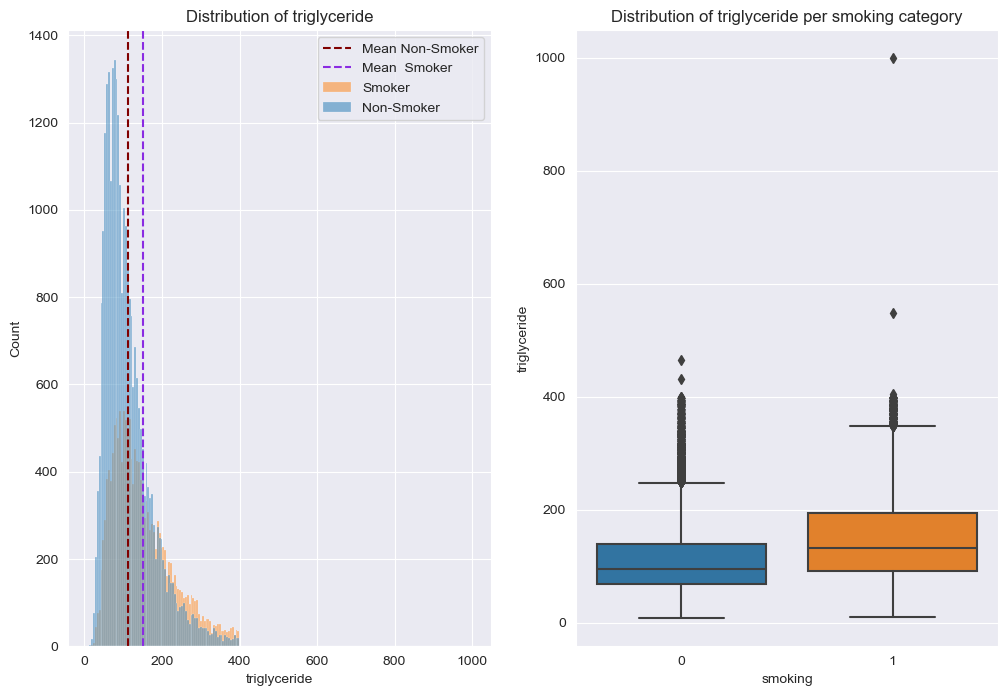

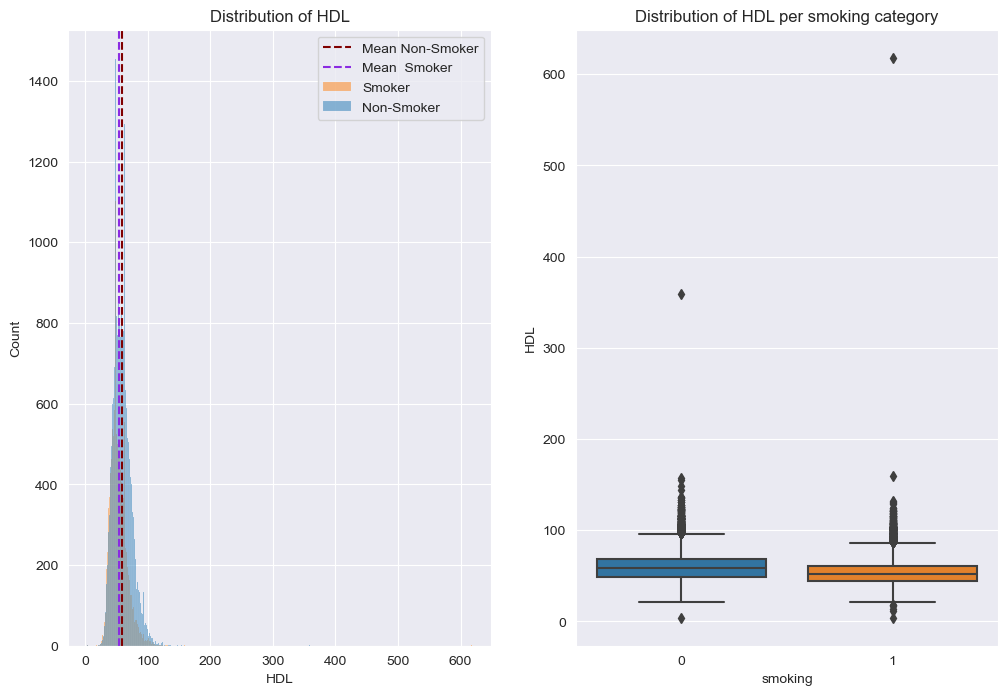

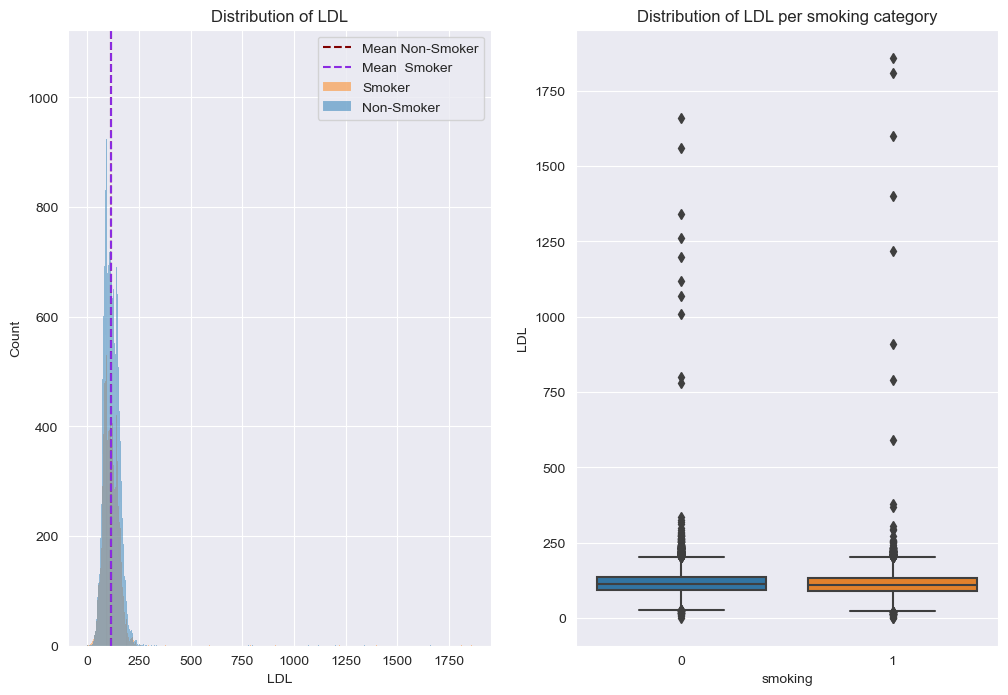

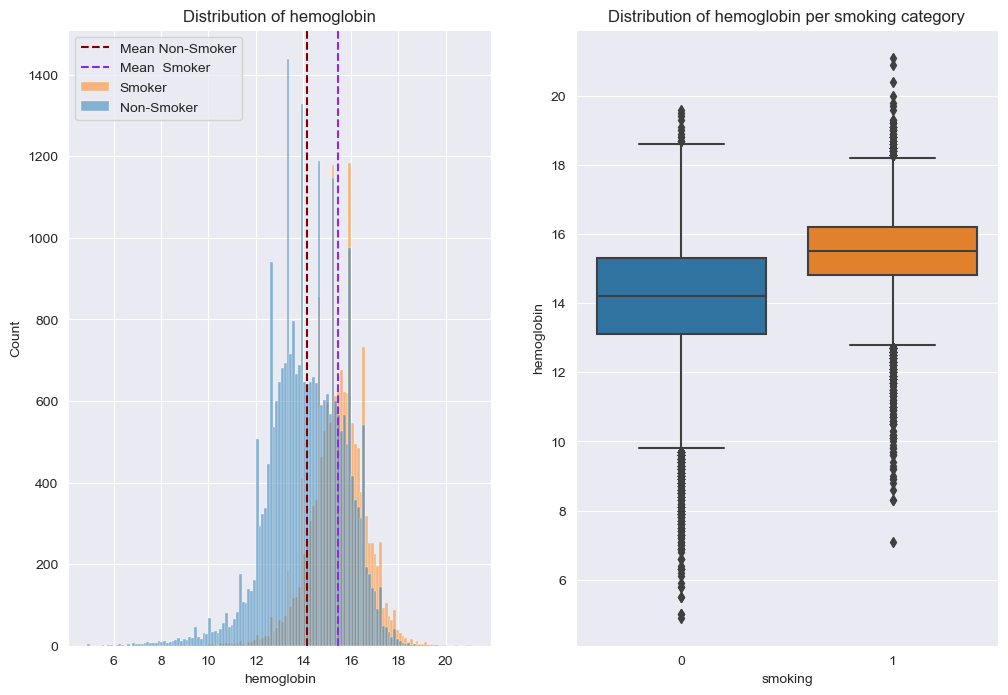

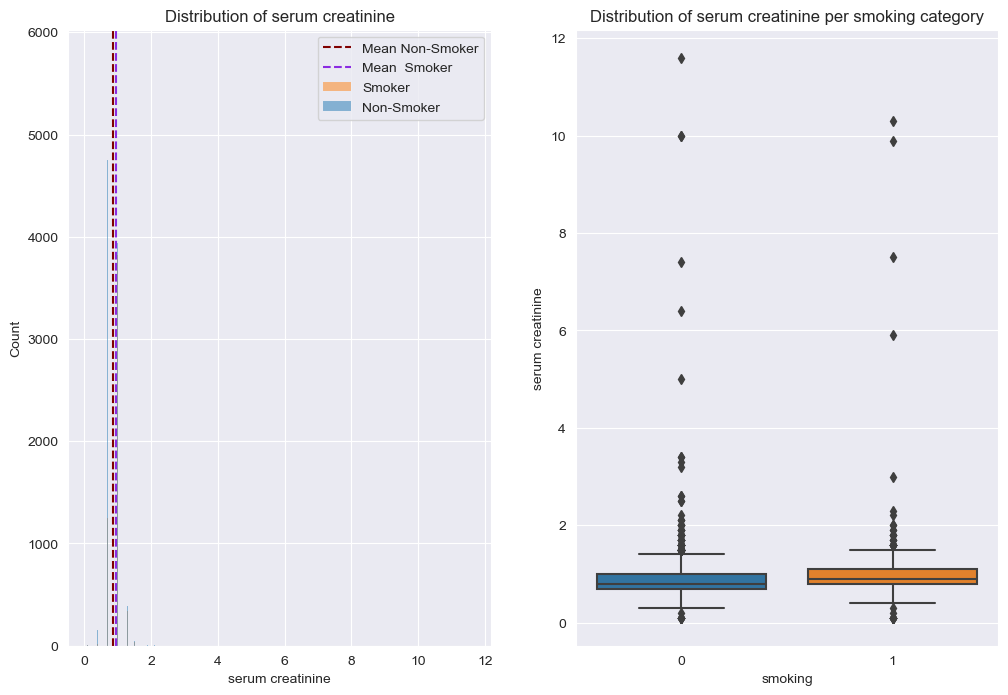

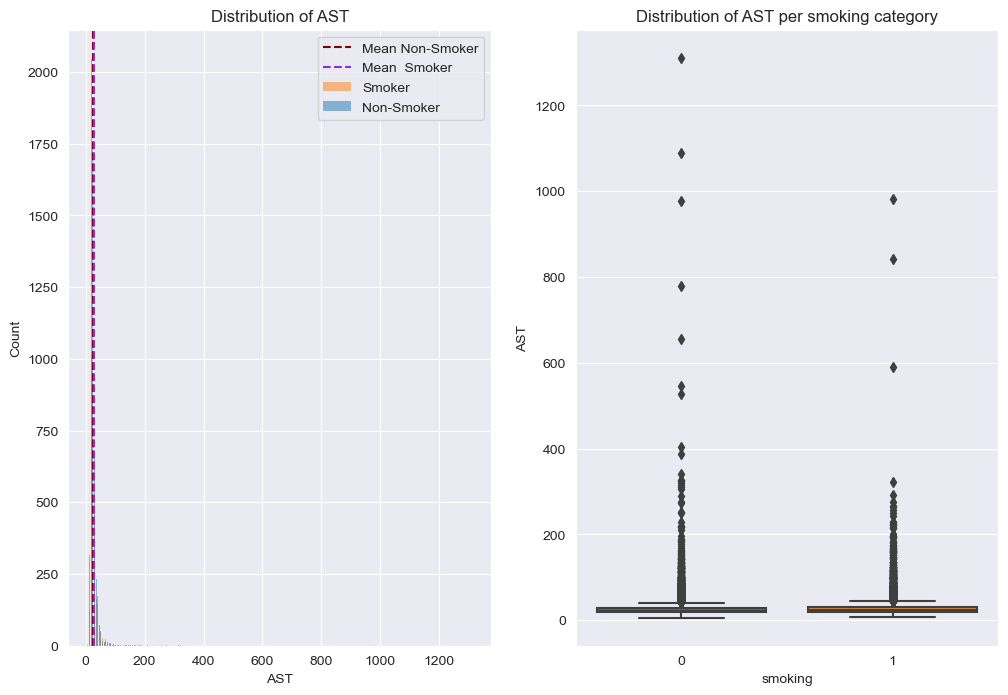

In [194]:
for col in num_cols[:-2]:
    num_plt(col)

**Hypothesis:**
- Target feature `smoking` is dependent on features - 'age', 'hemoglobin', 'height(cm)', 'weight(kg)' while independent on remaining features.

## Data Preprocesing

In [231]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'smoking')
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,                                                    
                                                    random_state = 42)
print("Shape of train set:", (X_train.shape, y_train.shape))

Shape of train set: ((35641, 24), (35641,))


In [236]:
X_train.select_dtypes(include= 'object')

,tartar
31742,Y
7945,Y
27480,Y
32289,N
12656,N
...,...
41522,Y
25830,Y
36084,N
35733,N


In [233]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

X_train['tartar'] = le.fit_transform(X_train['tartar'])
X_test['tartar'] = le.transform(X_test['tartar'])

sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

## Model Building

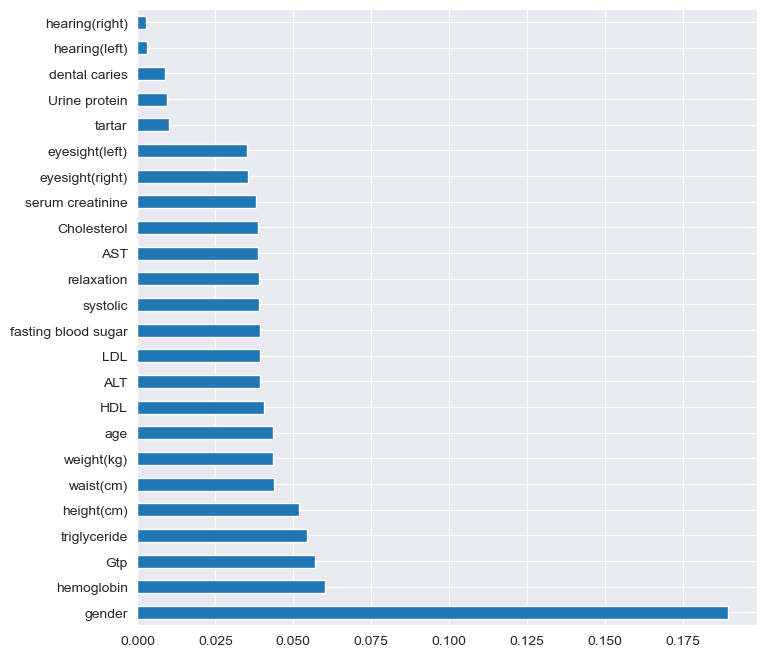

In [246]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
df1 = pd.Series(model.feature_importances_, index = X_train.columns)
plt.figure(figsize = (8,8))
df1.nlargest(24).plot(kind = 'barh')
plt.show()

**Observations:**
- Features 'Hearing', 'dental caries', 'urine protein', and 'tartar has very low feature importance score threfore we can drop out these features. 

### Model 1

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)


print(f"Accuracy of the logistic Regression Model is {lr_accuracy}")
print(f"\nClassification Report of the logistic Regression Model is" + f"\n{lr_report}")

Accuracy of the logistic Regression Model is 0.748961957131635

Classification Report of the logistic Regression Model is
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5640
           1       0.64      0.71      0.67      3271

    accuracy                           0.75      8911
   macro avg       0.73      0.74      0.73      8911
weighted avg       0.76      0.75      0.75      8911



### Model 2

In [312]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_report = classification_report(y_test, dtc_pred)


print(f"Accuracy of the Decision Tree Model is {dtc_accuracy}")
print(f"\nClassification Report of the Decision Tree Model is" + f"\n{dtc_report}")

Accuracy of the Decision Tree Model is 0.6851082931208619

Classification Report of the Decision Tree Model is
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5640
           1       0.57      0.57      0.57      3271

    accuracy                           0.69      8911
   macro avg       0.66      0.66      0.66      8911
weighted avg       0.68      0.69      0.68      8911



### Model 3

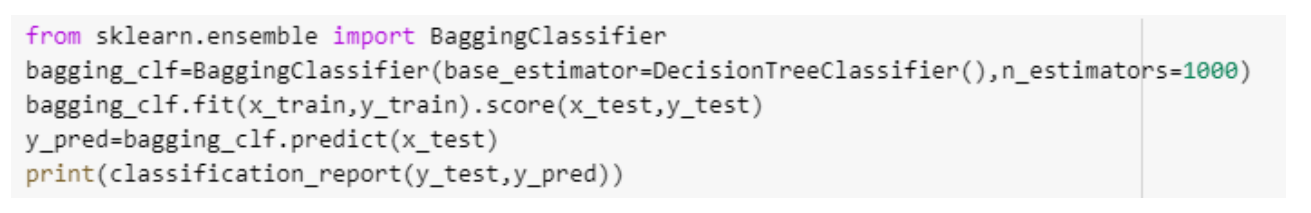

In [313]:
from sklearn.ensemble import BaggingClassifier

bagg_clf = BaggingClassifier(base_estimator= DecisionTreeClassifier(), n_estimators= 1000)
bagg_clf.fit(X_train, y_train)
bagg_pred = bagg_clf.predict(X_test)

bagg_accuracy = accuracy_score(y_test, bagg_pred)
bagg_report = classification_report(y_test, bagg_pred)


print(f"Accuracy of the Bagging Classifier Model is {bagg_accuracy}")
print(f"\nClassification Report of the Bagging Classifier Model is" + f"\n{bagg_report}")

Accuracy of the Bagging Classifier Model is 0.7572663000785546

Classification Report of the Bagging Classifier Model is
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5640
           1       0.66      0.71      0.68      3271

    accuracy                           0.76      8911
   macro avg       0.74      0.75      0.74      8911
weighted avg       0.76      0.76      0.76      8911

